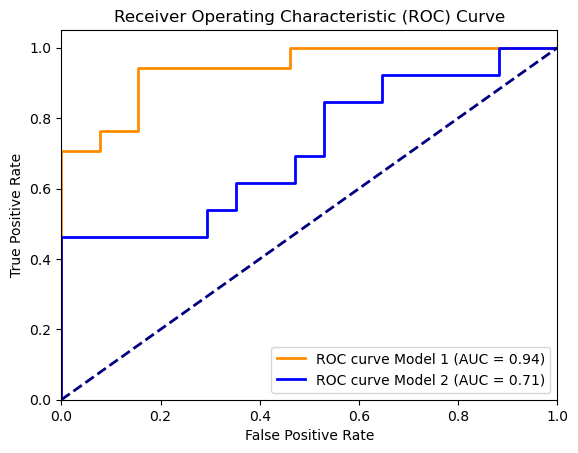

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Generate synthetic data for two models
np.random.seed(0)
n_samples = 100
x = np.linspace(0, 10, n_samples)
p1 = 1 / (1 + np.exp(-(x - 5)))  # Better model
p2 = np.random.rand(n_samples)   # Random model
y1 = np.random.binomial(1, p1)
y2 = np.random.binomial(1, p2)

data1 = pd.DataFrame({'x': x, 'y': y1})
data2 = pd.DataFrame({'x': x, 'y': y2})

# Train/test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1[['x']], data1['y'], test_size=0.3, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2[['x']], data2['y'], test_size=0.3, random_state=0)

# Fit logistic regression models
model1 = LogisticRegression()
model2 = LogisticRegression()

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

# Predict probabilities
y_pred_prob1 = model1.predict_proba(X_test1)[:, 1]
y_pred_prob2 = model2.predict_proba(X_test2)[:, 1]

# Calculate ROC curves
fpr1, tpr1, _ = roc_curve(y_test1, y_pred_prob1)
fpr2, tpr2, _ = roc_curve(y_test2, y_pred_prob2)

# Calculate AUC
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curves
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ROC curve Model 1 (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'ROC curve Model 2 (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
